In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [55]:
# increases plt font size
plt.rcParams.update({'font.size': 13})

In [56]:
dfs = {}

dirname = 'imgs_stalks'

for fn in os.listdir(dirname):
    if not fn.endswith('.csv'):
        continue
    mask_percent = float(fn.split(":")[1].split("_")[1])
    if mask_percent not in dfs:
        dfs[mask_percent] = []
    df = pd.read_csv(f'{dirname}/{fn}')
    dfs[mask_percent].append(df)

In [57]:
def avg_cols(dfs, col_name, win_size=-1):
    if win_size == -1:
        cols = np.array([df[col_name] for df in dfs])
    else:
        cols = np.array([df[col_name].rolling(window=win_size).mean() for df in dfs])
    # Check all cols are the same length
    if len(set([len(col) for col in cols])) != 1:
        raise ValueError(f"Not all columns are the same length, lengths:{set([len(col) for col in cols])}")
    return {
        f"{col_name}_mean": np.mean(cols, axis=0),
        f"{col_name}_std": np.std(cols, axis=0),
        f"{col_name}_median": np.median(cols, axis=0),
    }

def make_avg_dataframe(dfs, win_size=-1):
    cols = {}
    for k, v in avg_cols(dfs, 'PercentUniqueClassesProduced', win_size=win_size).items():
        cols[k] = v
    for k, v in avg_cols(dfs, 'PercentOfProductionsValid', win_size=win_size).items():
        cols[k] = v
    for k, v in avg_cols(dfs, 'BestEval', win_size=win_size).items():
        cols[k] = v
    for k, v in avg_cols(dfs, 'Generation', win_size=win_size).items():
        cols[k] = v
    return pd.DataFrame(cols)


In [58]:
win_size=1000
avg_dfs = {}
for mask_percent, dfs_list in dfs.items():
    avg_dfs[mask_percent] = make_avg_dataframe(dfs_list, win_size=win_size)

In [59]:
all_percents = sorted(list(dfs.keys()))
all_colors = []
for i in np.linspace(0, 1, len(all_percents)):
    all_colors.append((i, 1-i, 0))
all_colors[0] = (0,0,0)
all_pairs = []
for i in range(len(all_percents)):
    all_pairs.append((all_percents[i], all_colors[i], avg_dfs[all_percents[i]]))

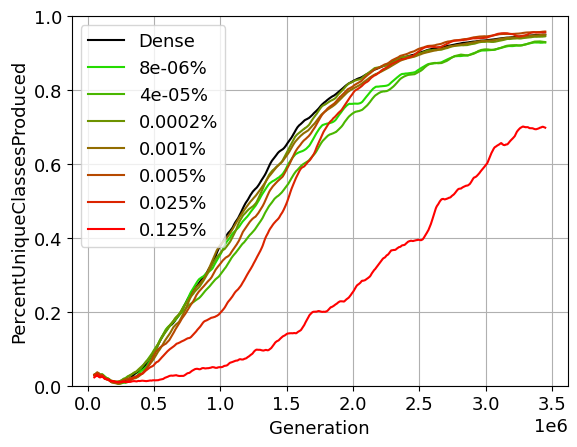

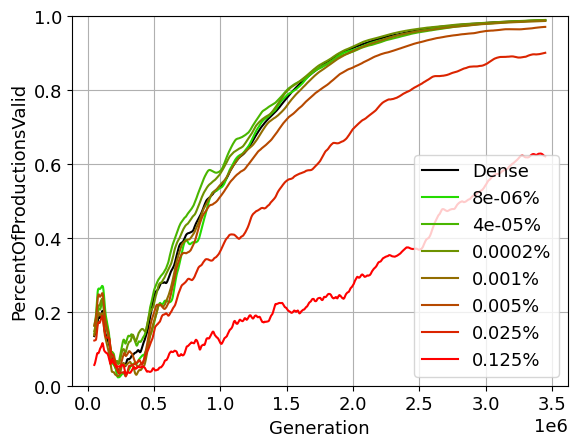

In [60]:
for mask_percent, col, avg_df in all_pairs:
    label = f"{mask_percent}%" if mask_percent != 0.0 else "Dense"
    plt.plot(avg_df['Generation_mean'], avg_df['PercentUniqueClassesProduced_mean'], label=label, color=col)
    #plt.fill_between(avg_df['Generation_mean'], avg_df['PercentUniqueClassesProduced_mean'] - avg_df['PercentUniqueClassesProduced_std'], avg_df['PercentUniqueClassesProduced_mean'] + avg_df['PercentUniqueClassesProduced_std'], alpha=0.2)
plt.legend()
plt.xlabel('Generation')
plt.ylabel('PercentUniqueClassesProduced')
plt.ylim(0, 1)
plt.grid()
plt.show()

for mask_percent, col, avg_df in all_pairs:
    label = f"{mask_percent}%" if mask_percent != 0.0 else "Dense"
    plt.plot(avg_df['Generation_mean'], avg_df['PercentOfProductionsValid_mean'], label=label, color=col)
    #plt.fill_between(avg_df['Generation_mean'], avg_df['PercentOfProductionsValid_mean'] - avg_df['PercentOfProductionsValid_std'], avg_df['PercentOfProductionsValid_mean'] + avg_df['PercentOfProductionsValid_std'], alpha=0.2)
plt.legend()
plt.xlabel('Generation')
plt.ylabel('PercentOfProductionsValid')
plt.ylim(0, 1)
plt.grid()
plt.show()

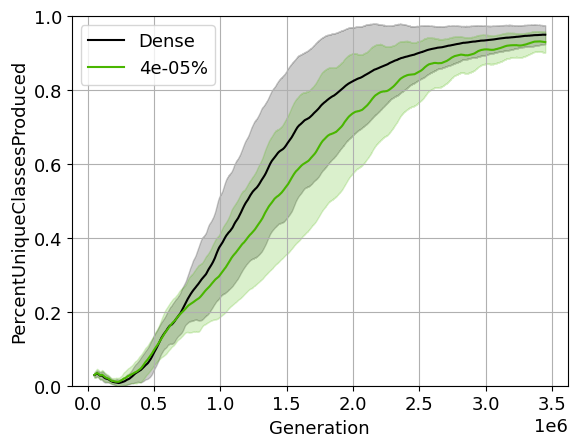

In [61]:
# plot same graph as a bove but using only 4e-05 and 0.0, along with stds
for mask_percent, col, avg_df in all_pairs:
    if mask_percent not in [4e-05, 0.0]:
        continue
    label = f"{mask_percent}%" if mask_percent != 0.0 else "Dense"
    plt.plot(avg_df['Generation_mean'], avg_df['PercentUniqueClassesProduced_mean'], label=label, color=col)
    plt.fill_between(avg_df['Generation_mean'], avg_df['PercentUniqueClassesProduced_mean'] - avg_df['PercentUniqueClassesProduced_std'], avg_df['PercentUniqueClassesProduced_mean'] + avg_df['PercentUniqueClassesProduced_std'], alpha=0.2, color=col)
plt.legend()
plt.xlabel('Generation')
plt.ylabel('PercentUniqueClassesProduced')
plt.ylim(0, 1)
plt.grid()
plt.show()

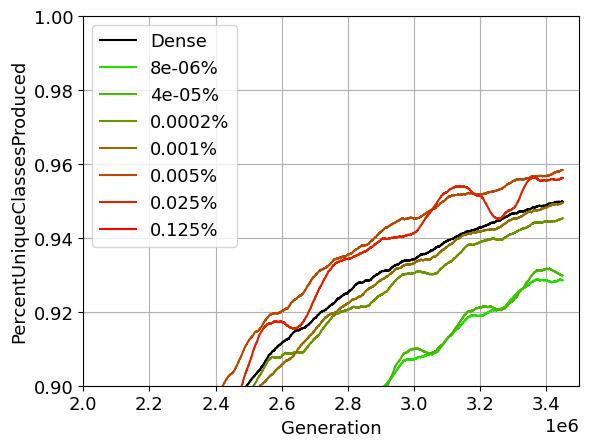

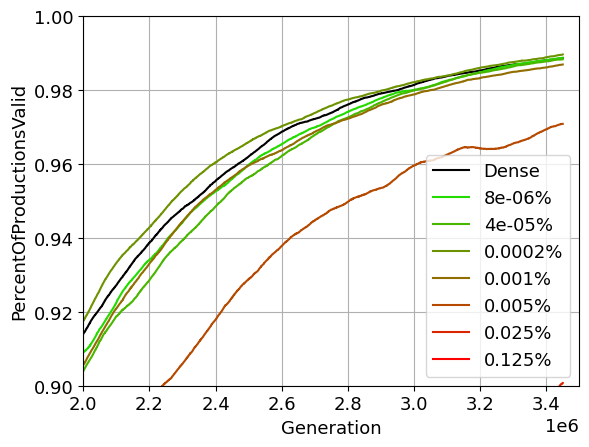

In [62]:
for mask_percent, col, avg_df in all_pairs:
    label = f"{mask_percent}%" if mask_percent != 0.0 else "Dense"
    plt.plot(avg_df['Generation_mean'], avg_df['PercentUniqueClassesProduced_mean'], label=label, color=col)
    #plt.fill_between(avg_df['Generation_mean'], avg_df['PercentUniqueClassesProduced_mean'] - avg_df['PercentUniqueClassesProduced_std'], avg_df['PercentUniqueClassesProduced_mean'] + avg_df['PercentUniqueClassesProduced_std'], alpha=0.2)
plt.legend()
plt.xlabel('Generation')
plt.ylabel('PercentUniqueClassesProduced')
plt.ylim(0.9, 1)
plt.xlim(2e6, 3.5e6)
plt.grid()
plt.show()

for mask_percent, col, avg_df in all_pairs:
    label = f"{mask_percent}%" if mask_percent != 0.0 else "Dense"
    plt.plot(avg_df['Generation_mean'], avg_df['PercentOfProductionsValid_mean'], label=label, color=col)
    #plt.fill_between(avg_df['Generation_mean'], avg_df['PercentOfProductionsValid_mean'] - avg_df['PercentOfProductionsValid_std'], avg_df['PercentOfProductionsValid_mean'] + avg_df['PercentOfProductionsValid_std'], alpha=0.2)
plt.legend()
plt.xlabel('Generation')
plt.ylabel('PercentOfProductionsValid')
plt.ylim(0.9, 1)
plt.xlim(2e6, 3.5e6)
plt.grid()
plt.show()